This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

There are a few areas of concern at the solar power plant:

- Can we predict the power generation for next couple of days? - this allows for better grid management
- Can we identify the need for panel cleaning/maintenance?
- Can we identify faulty or suboptimally performing equipment?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
plant1_gen = pd.read_csv('../excel/solar_energy/Plant_1_Generation_Data.csv')
plant1_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
plant1_gen['DATE_TIME']=plant1_gen['DATE_TIME'].astype(np.datetime64)

In [4]:
plant1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
DATE_TIME      68778 non-null datetime64[ns]
PLANT_ID       68778 non-null int64
SOURCE_KEY     68778 non-null object
DC_POWER       68778 non-null float64
AC_POWER       68778 non-null float64
DAILY_YIELD    68778 non-null float64
TOTAL_YIELD    68778 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


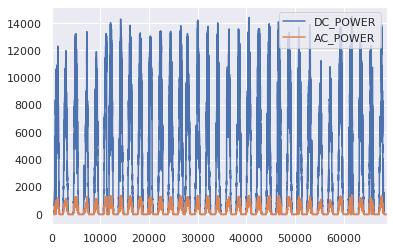

In [5]:
plant1_gen[['DC_POWER','AC_POWER']].plot()

In [6]:
plant1_gen.groupby('SOURCE_KEY').describe()[['DC_POWER','AC_POWER']]

DC_POWER                                                  \
                   count         mean          std  min  25%         50%   
SOURCE_KEY                                                                 
1BY6WEcLGh8j5v7   3154.0  2873.720981  3761.145773  0.0  0.0  302.955357   
1IF53ai7Xc0U56Y   3119.0  3226.336768  4117.942833  0.0  0.0  451.625000   
3PZuoBAID5Wc2HD   3118.0  3221.015673  4118.576051  0.0  0.0  456.160714   
7JYdWkrLSPkdwr4   3133.0  3132.891955  4014.963827  0.0  0.0  438.571429   
McdE0feGgRqW7Ca   3124.0  3211.307245  4117.113844  0.0  0.0  439.571429   
VHMLBKoKgIrUVDU   3133.0  3210.102563  4114.886897  0.0  0.0  446.714286   
WRmjgnKYAwPKWDb   3118.0  3155.384433  4029.070312  0.0  0.0  449.428571   
YxYtjZvoooNbGkE   3104.0  3179.492570  4050.058516  0.0  0.0  480.642857   
ZnxXDlPa8U1GXgE   3130.0  3194.059104  4092.017013  0.0  0.0  438.258929   
ZoEaEvLYb1n2sOq   3123.0  3139.009808  4010.701129  0.0  0.0  451.000000   
adLQvlD726eNBSB   3119.0  3269.567669  4175.815364  0.0  0.0  469.857143   
bvBOhCH3iADSZry   3155.0  2828.998291  3698.531647  0.0  0.0  285.000000   
iCRJl6heRkivqQ3   3125.0  3196.074675  4087.526979  0.0  0.0  442.285714   
ih0vzX44oOqAx2f   3130.0  3097.714161  3971.122441  0.0  0.0  428.571429   
pkci93gMrogZuBj   3125.0  3166.599439  4042.101194  0.0  0.0  439.714286   
rGa61gmuvPhdLxV   3124.0  3163.240929  4040.112422  0.0  0.0  445.830357   
sjndEbLyjtCKgGv   3124.0  3148.270450  4028.665755  0.0  0.0  431.750000   
uHbuxQJl8lW7ozc   3125.0  3195.316080  4077.234652  0.0  0.0  448.571429   
wCURE6d3bPkepu2   3126.0  3170.704424  4081.628327  0.0  0.0  433.446429   
z9Y9gH1T5YWrNuG   3126.0  3134.037738  4028.058883  0.0  0.0  414.000000   
zBIq5rxdHJRwDNY   3119.0  3148.590013  4024.500149  0.0  0.0  441.428571   
zVJPv84UY57bAof   3124.0  3187.236622  4080.647086  0.0  0.0  440.125000   

                                          AC_POWER                          \
                         75%          max    count        mean         std   
SOURCE_KEY                                                                   
1BY6WEcLGh8j5v7  5775.531250  13335.14286   3154.0  281.124073  367.646871   
1IF53ai7Xc0U56Y  6494.571428  14302.71429   3119.0  315.488026  402.301747   
3PZuoBAID5Wc2HD  6503.294643  14351.12500   3118.0  314.967354  402.373790   
7JYdWkrLSPkdwr4  6309.000000  14204.00000   3133.0  306.385671  392.300240   
McdE0feGgRqW7Ca  6506.245536  14418.42857   3124.0  314.046321  402.278537   
VHMLBKoKgIrUVDU  6461.571429  14299.85714   3133.0  313.900096  402.009046   
WRmjgnKYAwPKWDb  6347.937500  14116.25000   3118.0  308.575465  393.673488   
YxYtjZvoooNbGkE  6408.562500  14466.85714   3104.0  310.930334  395.711539   
ZnxXDlPa8U1GXgE  6463.468750  14273.28571   3130.0  312.346427  399.791497   
ZoEaEvLYb1n2sOq  6390.392857  14312.71429   3123.0  306.980623  391.891363   
adLQvlD726eNBSB  6548.571428  14416.14286   3119.0  319.693862  407.920560   
bvBOhCH3iADSZry  5708.562500  12976.00000   3155.0  276.778938  361.579929   
iCRJl6heRkivqQ3  6524.000000  14436.28571   3125.0  312.540320  399.354809   
ih0vzX44oOqAx2f  6258.145833  14126.42857   3130.0  302.962438  388.040381   
pkci93gMrogZuBj  6421.375000  14149.87500   3125.0  309.670213  394.942694   
rGa61gmuvPhdLxV  6414.312500  14285.71429   3124.0  309.345658  394.750370   
sjndEbLyjtCKgGv  6382.575893  14357.42857   3124.0  307.912265  393.687601   
uHbuxQJl8lW7ozc  6509.333333  14125.62500   3125.0  312.467844  398.359247   
wCURE6d3bPkepu2  6429.214286  14471.12500   3126.0  310.064044  398.780301   
z9Y9gH1T5YWrNuG  6352.535714  14370.50000   3126.0  306.492026  393.570990   
zBIq5rxdHJRwDNY  6395.142857  14289.57143   3119.0  307.925344  393.246025   
zVJPv84UY57bAof  6468.571429  14329.14286   3124.0  311.676665  398.685362   

                                                               
                 min  25%        50%         75%          max  
SOURCE_KEY                          

In [7]:
# sns.pairplot(plant1_gen[['SOURCE_KEY','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']], hue='SOURCE_KEY')

AC_POWER and DC_POWER have a linear relationship. Investiigate DAILY_YIELD and TOTAL_YIELD, and days of week.

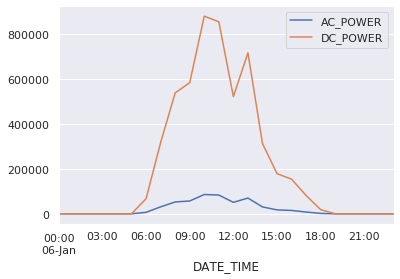

In [8]:
plant1_gen.resample('h', on='DATE_TIME').sum()[['AC_POWER','DC_POWER']].head(24).plot()

In [9]:
solar_panels = plant1_gen.SOURCE_KEY.drop_duplicates().sort_values()
solar_panels

0     1BY6WEcLGh8j5v7
1     1IF53ai7Xc0U56Y
2     3PZuoBAID5Wc2HD
3     7JYdWkrLSPkdwr4
4     McdE0feGgRqW7Ca
5     VHMLBKoKgIrUVDU
6     WRmjgnKYAwPKWDb
91    YxYtjZvoooNbGkE
7     ZnxXDlPa8U1GXgE
8     ZoEaEvLYb1n2sOq
9     adLQvlD726eNBSB
10    bvBOhCH3iADSZry
11    iCRJl6heRkivqQ3
12    ih0vzX44oOqAx2f
13    pkci93gMrogZuBj
14    rGa61gmuvPhdLxV
15    sjndEbLyjtCKgGv
16    uHbuxQJl8lW7ozc
17    wCURE6d3bPkepu2
18    z9Y9gH1T5YWrNuG
19    zBIq5rxdHJRwDNY
20    zVJPv84UY57bAof
Name: SOURCE_KEY, dtype: object

In [10]:
sp1 = plant1_gen.query("SOURCE_KEY == @solar_panels[0]")  
sp1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
21,2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
42,2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
63,2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
84,2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
...,...,...,...,...,...,...,...
68668,2020-06-17 22:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68690,2020-06-17 23:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68712,2020-06-17 23:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68734,2020-06-17 23:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0


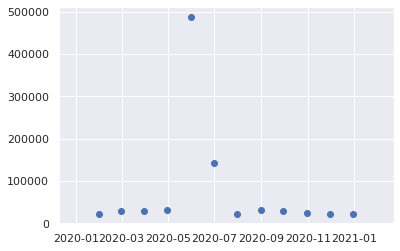

In [33]:
plt.scatter(sp1.set_index('DATE_TIME').AC_POWER.resample('M').sum().index,sp1.set_index('DATE_TIME').AC_POWER.resample('M').sum())

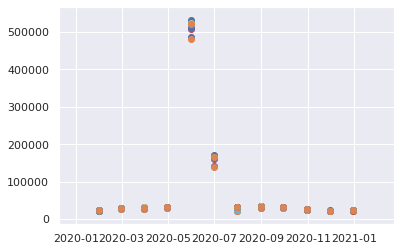

In [35]:
for sp in solar_panels:
    temp = plant1_gen.query("SOURCE_KEY == @sp").set_index('DATE_TIME').AC_POWER.resample('M').sum()
    plt.scatter(temp.index, temp)

In [41]:
plant1_sen = pd.read_csv('../excel/solar_energy/Plant_1_Weather_Sensor_Data.csv')
plant1_sen.DATE_TIME = plant1_sen.DATE_TIME.astype(np.datetime64)
plant1_sen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [43]:
plant1_sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
DATE_TIME              3182 non-null datetime64[ns]
PLANT_ID               3182 non-null int64
SOURCE_KEY             3182 non-null object
AMBIENT_TEMPERATURE    3182 non-null float64
MODULE_TEMPERATURE     3182 non-null float64
IRRADIATION            3182 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [48]:
plant1_sen.set_index('DATE_TIME').AMBIENT_TEMPERATURE

DATE_TIME
2020-05-15 00:00:00    25.184316
2020-05-15 00:15:00    25.084589
2020-05-15 00:30:00    24.935753
2020-05-15 00:45:00    24.846130
2020-05-15 01:00:00    24.621525
                         ...    
2020-06-17 22:45:00    22.150570
2020-06-17 23:00:00    22.129816
2020-06-17 23:15:00    22.008275
2020-06-17 23:30:00    21.969495
2020-06-17 23:45:00    21.909288
Name: AMBIENT_TEMPERATURE, Length: 3182, dtype: float64

In [76]:
mask1 = plant1_gen.DATE_TIME >= np.datetime64('2020-05-17')

In [60]:
mask2 = plant1_gen.DATE_TIME < np.datetime64('2020-06-18')

In [87]:
plant1_gen_an = plant1_gen[mask1 & mask2]
ref1 = plant1_gen_an.query("SOURCE_KEY == @solar_panels[1]").set_index('DATE_TIME')
ref1.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-17 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6196594.0
2020-05-17 00:15:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6196594.0
2020-05-17 00:30:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6196594.0
2020-05-17 00:45:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6196594.0
2020-05-17 01:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6196594.0


In [88]:
ref1.resample('M').sum()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,
2020-05-31,5478876325,4.542217e+06,444014.158929,4.593088e+06,8.287375e+09
2020-06-30,2373490574,1.723266e+06,168556.059999,1.998741e+06,3.677155e+09


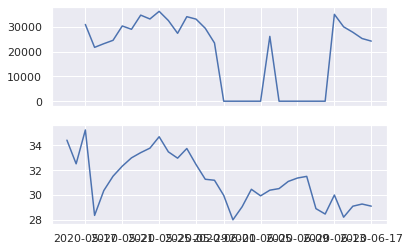

In [99]:
fig1 ,ax1 = plt.subplots(2, 1, sharex='col')

ax1[0].plot(ref1['AC_POWER'].resample('D').sum())
ax1[1].plot(plant1_sen.set_index('DATE_TIME').AMBIENT_TEMPERATURE.resample('D').max())